In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
train_data=pd.read_csv("New Dataset/train.csv")
train_data.head()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,0,0,0,0,0,1,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,1,1,1,1,1,0,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,1,1,1,1,1,0,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,0,1,0,0,1,0,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,1,1,0,1,0,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Battery_Power  2000 non-null   int64  
 1   Clock_Speed    2000 non-null   float64
 2   FC             2000 non-null   int64  
 3   Int_Memory     2000 non-null   int64  
 4   Mobile_D       2000 non-null   float64
 5   Mobile_W       2000 non-null   int64  
 6   Cores          2000 non-null   int64  
 7   PC             2000 non-null   int64  
 8   Pixel_H        2000 non-null   int64  
 9   Pixel_W        2000 non-null   int64  
 10  Ram            2000 non-null   int64  
 11  Screen_H       2000 non-null   int64  
 12  Screen_W       2000 non-null   int64  
 13  Talk_Time      2000 non-null   int64  
 14  Four_G         2000 non-null   int64  
 15  Three_G        2000 non-null   int64  
 16  Touch_Screen   2000 non-null   int64  
 17  Dual_SIM       2000 non-null   int64  
 18  Bluetoot

In [6]:
train_data_f = train_data[train_data['Screen_W'] != 0]
train_data_f.shape

(1820, 21)

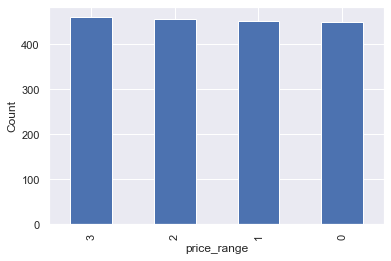

In [9]:
#classes
sns.set()
price_plot=train_data_f['Price_Range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

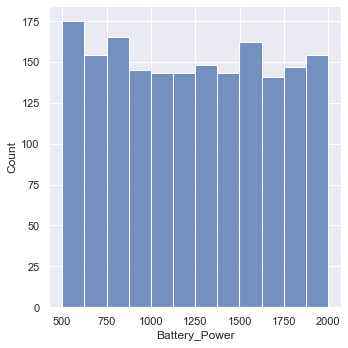

In [11]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["Battery_Power"])
plt.show()

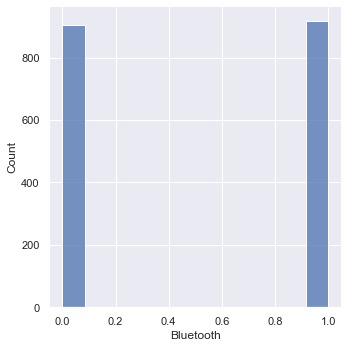

In [13]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["Bluetooth"])
plt.show()

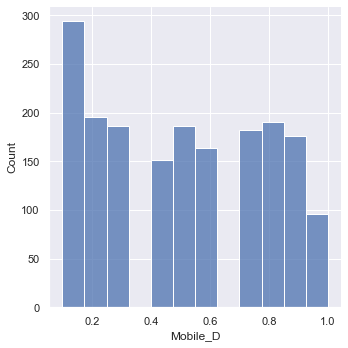

In [14]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["Mobile_D"])
plt.show()

In [15]:
X=train_data_f.drop(['Price_Range'], axis=1)
y=train_data_f['Price_Range']
#missing values
X.isna().any()

Battery_Power    False
Clock_Speed      False
FC               False
Int_Memory       False
Mobile_D         False
Mobile_W         False
Cores            False
PC               False
Pixel_H          False
Pixel_W          False
Ram              False
Screen_H         False
Screen_W         False
Talk_Time        False
Four_G           False
Three_G          False
Touch_Screen     False
Dual_SIM         False
Bluetooth        False
WiFi             False
dtype: bool

In [16]:
#train test split of data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

In [17]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [18]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [19]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)

# Random Forest Classifier

Random Forest Classifier Accuracy Score:  0.9148351648351648
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.91      0.92      0.92        92
           2       0.83      0.87      0.85        86
           3       0.93      0.89      0.91        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.92      0.91      0.92       364



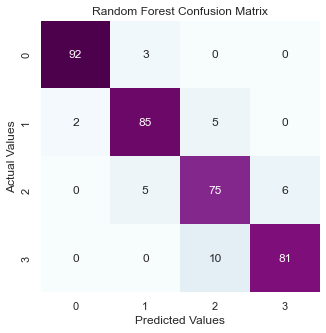

In [20]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

# Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [22]:
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)

Gaussian NB Classifier Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.79      0.73      0.76        92
           2       0.74      0.80      0.77        86
           3       0.92      0.93      0.93        91

    accuracy                           0.85       364
   macro avg       0.84      0.85      0.84       364
weighted avg       0.85      0.85      0.85       364



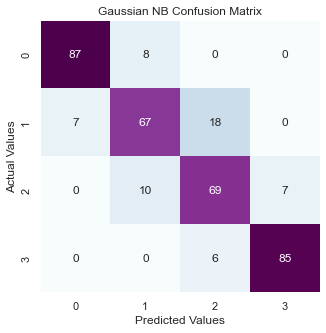

In [23]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')

# KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

In [25]:
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)

KNN Classifier Accuracy Score:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



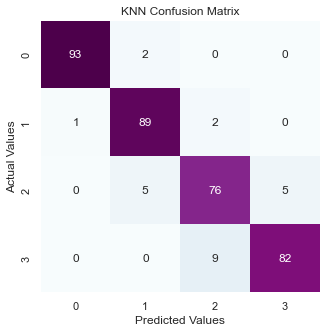

In [26]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

# SVM Classifier

In [27]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)

SVM Classifier Accuracy Score:  0.9587912087912088
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.94      0.93      0.94        86
           3       0.99      0.96      0.97        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



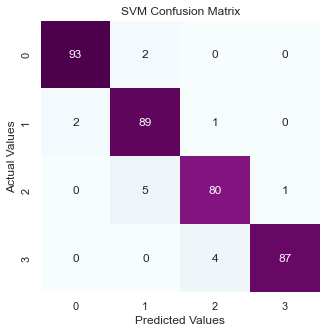

In [28]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

### -Made by Manish Kumar (Crimson Wing)